# Imports and Data Frame Creation

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy.stats.mstats import winsorize
import seaborn as sns

In [2]:
df = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/diabetic-data-cleaning.zip', compression='zip')

# '?' Entered into Data

In [3]:
for col in df.describe().columns:
    nanidx = df[col].sample(frac=np.random.uniform(0.0, 0.001)).index
    df.loc[nanidx, col] = '?'

# Understanding the Data

In [4]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [5]:
df.describe()

,num_procedures,number_diagnoses
count,101766.000000,101766.000000
mean,1.339730,7.422607
std,1.705807,1.933600
min,0.000000,1.000000
25%,0.000000,6.000000
50%,1.000000,8.000000
75%,2.000000,9.000000
max,6.000000,16.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null object
patient_nbr                 101766 non-null object
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null object
discharge_disposition_id    101766 non-null object
admission_source_id         101766 non-null object
time_in_hospital            101766 non-null object
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null object
num_procedures              101766 non-null int64
num_medications             101766 non-null object
number_outpatient           101766 non-null object
number_emergency            101766 non-null object
number_inpatient       

In [7]:
df.weight.value_counts()

?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: weight, dtype: int64

In [8]:
for col in list(df.columns):
    print(df.loc[df[col] == '?'])

       encounter_id patient_nbr             race  gender       age   weight  \
891               ?    92152944  AfricanAmerican  Female   [60-70)        ?   
1263              ?     3780513        Caucasian    Male   [60-70)        ?   
1994              ?     4327020        Caucasian    Male   [30-40)        ?   
4223              ?      807975        Caucasian    Male   [60-70)        ?   
4579              ?     5583195        Caucasian  Female   [60-70)        ?   
5221              ?    23635107  AfricanAmerican  Female   [70-80)        ?   
5833              ?     6825555  AfricanAmerican    Male   [60-70)        ?   
6939              ?     1297944        Caucasian  Female   [60-70)        ?   
7391              ?    31756824                ?    Male   [50-60)        ?   
8141              ?      283689        Caucasian    Male   [60-70)        ?   
9351              ?     7804071  AfricanAmerican  Female   [40-50)        ?   
9479              ?    16663203        Caucasian    

[2273 rows x 50 columns]
Empty DataFrame
Columns: [encounter_id, patient_nbr, race, gender, age, weight, admission_type_id, discharge_disposition_id, admission_source_id, time_in_hospital, payer_code, medical_specialty, num_lab_procedures, num_procedures, num_medications, number_outpatient, number_emergency, number_inpatient, diag_1, diag_2, diag_3, number_diagnoses, max_glu_serum, A1Cresult, metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, citoglipton, insulin, glyburide-metformin, glipizide-metformin, glimepiride-pioglitazone, metformin-rosiglitazone, metformin-pioglitazone, change, diabetesMed, readmitted]
Index: []

[0 rows x 50 columns]
Empty DataFrame
Columns: [encounter_id, patient_nbr, race, gender, age, weight, admission_type_id, discharge_disposition_id, admission_source_id, time_in_hospital, payer_code, medical_specialty, num_

[96 rows x 50 columns]
       encounter_id patient_nbr             race  gender       age     weight  \
1718       11331240    71616321         Hispanic    Male   [50-60)          ?   
2331       15343914     4039092        Caucasian    Male   [50-60)          ?   
3058       19423404       13041        Caucasian  Female   [60-70)          ?   
3759       22547316    23409027        Caucasian    Male   [60-70)          ?   
7753       36110790      738342  AfricanAmerican    Male   [20-30)          ?   
9604       41622216    19142064        Caucasian    Male   [70-80)          ?   
9691       41881170      600984        Caucasian  Female   [30-40)          ?   
11318      46863666      609480  AfricanAmerican  Female   [50-60)          ?   
12102      49480428    69916383        Caucasian  Female   [60-70)          ?   
12380      50436450     2526498  AfricanAmerican    Male   [30-40)          ?   
12708      51366996      299349  AfricanAmerican  Female   [20-30)          ?   
14154

       encounter_id patient_nbr             race  gender       age weight  \
1            149190    55629189        Caucasian  Female   [10-20)      ?   
2             64410    86047875  AfricanAmerican  Female   [20-30)      ?   
3            500364    82442376        Caucasian    Male   [30-40)      ?   
4             16680    42519267        Caucasian    Male   [40-50)      ?   
5             35754    82637451        Caucasian    Male   [50-60)      ?   
6             55842    84259809        Caucasian    Male   [60-70)      ?   
7             63768   114882984        Caucasian    Male   [70-80)      ?   
8             12522    48330783        Caucasian  Female   [80-90)      ?   
10            28236    89869032  AfricanAmerican  Female   [40-50)      ?   
11            36900    77391171  AfricanAmerican    Male   [60-70)      ?   
14            62256    49726791  AfricanAmerican  Female   [60-70)      ?   
15            73578    86328819  AfricanAmerican    Male   [60-70)      ?   

Empty DataFrame
Columns: [encounter_id, patient_nbr, race, gender, age, weight, admission_type_id, discharge_disposition_id, admission_source_id, time_in_hospital, payer_code, medical_specialty, num_lab_procedures, num_procedures, num_medications, number_outpatient, number_emergency, number_inpatient, diag_1, diag_2, diag_3, number_diagnoses, max_glu_serum, A1Cresult, metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, citoglipton, insulin, glyburide-metformin, glipizide-metformin, glimepiride-pioglitazone, metformin-rosiglitazone, metformin-pioglitazone, change, diabetesMed, readmitted]
Index: []

[0 rows x 50 columns]
Empty DataFrame
Columns: [encounter_id, patient_nbr, race, gender, age, weight, admission_type_id, discharge_disposition_id, admission_source_id, time_in_hospital, payer_code, medical_specialty, num_lab_procedures, num_proce

Empty DataFrame
Columns: [encounter_id, patient_nbr, race, gender, age, weight, admission_type_id, discharge_disposition_id, admission_source_id, time_in_hospital, payer_code, medical_specialty, num_lab_procedures, num_procedures, num_medications, number_outpatient, number_emergency, number_inpatient, diag_1, diag_2, diag_3, number_diagnoses, max_glu_serum, A1Cresult, metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, citoglipton, insulin, glyburide-metformin, glipizide-metformin, glimepiride-pioglitazone, metformin-rosiglitazone, metformin-pioglitazone, change, diabetesMed, readmitted]
Index: []

[0 rows x 50 columns]
Empty DataFrame
Columns: [encounter_id, patient_nbr, race, gender, age, weight, admission_type_id, discharge_disposition_id, admission_source_id, time_in_hospital, payer_code, medical_specialty, num_lab_procedures, num_proce

In [9]:
list(df.columns)

['encounter_id',
 'patient_nbr',
 'race',
 'gender',
 'age',
 'weight',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'payer_code',
 'medical_specialty',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'diag_1',
 'diag_2',
 'diag_3',
 'number_diagnoses',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed',
 'readmitted']

# Replace '?' with NaN

In [10]:
df2 = df.replace('?', np.nan)

# Convert Objects to Floats

In [11]:
df2 = df2.astype({'time_in_hospital': 'float', 'num_lab_procedures': 'float', 'num_procedures': 'float',
                  'num_medications': 'float', 'number_outpatient': 'float', 'number_emergency': 'float',
                 'number_inpatient': 'float'}, copy = False)

In [12]:
df2.isnull().sum()*100/df2.isnull().count()

encounter_id                 0.070751
patient_nbr                  0.029479
race                         2.233555
gender                       0.000000
age                          0.000000
weight                      96.858479
admission_type_id            0.094334
discharge_disposition_id     0.085490
admission_source_id          0.056011
time_in_hospital             0.092369
payer_code                  39.557416
medical_specialty           49.082208
num_lab_procedures           0.009826
num_procedures               0.000000
num_medications              0.002948
number_outpatient            0.029479
number_emergency             0.018670
number_inpatient             0.052080
diag_1                       0.020636
diag_2                       0.351787
diag_3                       1.398306
number_diagnoses             0.000000
max_glu_serum                0.000000
A1Cresult                    0.000000
metformin                    0.000000
repaglinide                  0.000000
nateglinide 

In [13]:
df2.weight.value_counts()

[75-100)     1336
[50-75)       897
[100-125)     625
[125-150)     145
[25-50)        97
[0-25)         48
[150-175)      35
[175-200)      11
>200            3
Name: weight, dtype: int64

In [14]:
df2 = df2.drop(columns = ['weight', 'payer_code', 'medical_specialty', 'encounter_id', 'patient_nbr'])

In [15]:
df2.head(10)

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6.0,25.0,1.0,1.0,41.0,0.0,1.0,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),1.0,1.0,7.0,3.0,59.0,0.0,18.0,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),1.0,1.0,7.0,2.0,11.0,5.0,13.0,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),1.0,1.0,7.0,2.0,44.0,1.0,16.0,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),1.0,1.0,7.0,1.0,51.0,0.0,8.0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,Caucasian,Male,[50-60),2.0,1.0,2.0,3.0,31.0,6.0,16.0,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,Caucasian,Male,[60-70),3.0,1.0,2.0,4.0,70.0,1.0,21.0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,Caucasian,Male,[70-80),1.0,1.0,7.0,5.0,73.0,0.0,12.0,...,No,No,No,No,No,No,No,No,Yes,>30
8,Caucasian,Female,[80-90),2.0,1.0,4.0,13.0,68.0,2.0,28.0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,Caucasian,Female,[90-100),3.0,3.0,4.0,12.0,33.0,3.0,18.0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [16]:
df3 = df2.loc[:,['time_in_hospital','num_lab_procedures','num_procedures', 'number_outpatient', 'number_emergency', 'number_inpatient']]


# Fill NaN with Column Mean

In [17]:
df3 = df2.fillna(df2.mean())
df3.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6.0,25.0,1.0,1.0,41.0,0.0,1.0,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),1.0,1.0,7.0,3.0,59.0,0.0,18.0,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),1.0,1.0,7.0,2.0,11.0,5.0,13.0,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),1.0,1.0,7.0,2.0,44.0,1.0,16.0,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),1.0,1.0,7.0,1.0,51.0,0.0,8.0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


# Visualizing Outliers

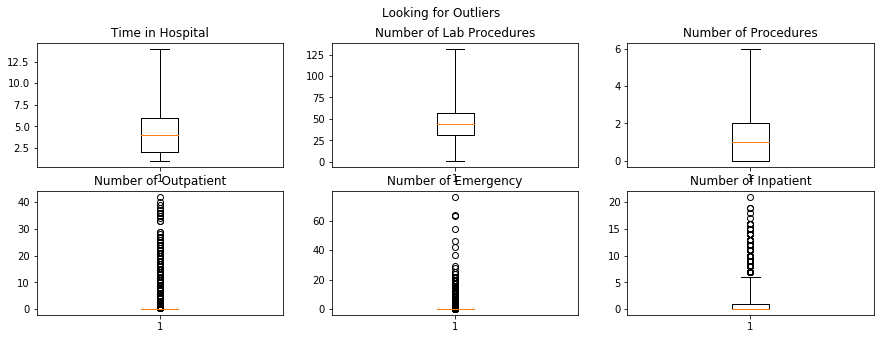

In [18]:
plt.figure(figsize = (15,5)) 

plt.subplot(2,3,1)
plt.boxplot(df3['time_in_hospital'], whis = 5)
plt.title('Time in Hospital')

plt.subplot(2,3,2)
plt.boxplot(df3['num_lab_procedures'], whis = 5)
plt.title('Number of Lab Procedures')

plt.subplot(2,3,3)
plt.boxplot(df3['num_procedures'], whis = 5)
plt.title('Number of Procedures')

plt.subplot(2,3,4)
plt.boxplot(df3['number_outpatient'], whis = 5)
plt.title('Number of Outpatient')

plt.subplot(2,3,5)
plt.boxplot(df3['number_emergency'], whis = 5)
plt.title('Number of Emergency')

plt.subplot(2,3,6)
plt.boxplot(df3['number_inpatient'], whis = 5)
plt.title('Number of Inpatient')

plt.suptitle('Looking for Outliers')
plt.show()

# Winsorizing Outliers

In [19]:
winsorized_number_outpatient = winsorize(df3['number_outpatient'], (0, .05))
winsorized_number_emergency = winsorize(df3['number_emergency'], (0, .05))
winsorized_number_inpatient = winsorize(df3['number_inpatient'], (0, .05))

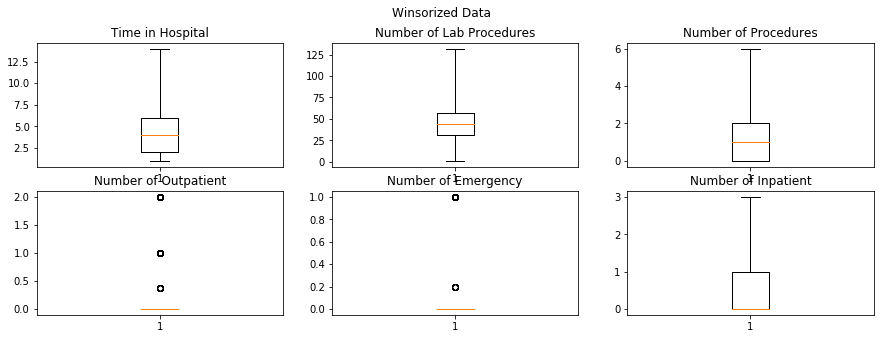

In [20]:
plt.figure(figsize = (15,5)) 

plt.subplot(2,3,1)
plt.boxplot(df3['time_in_hospital'], whis = 5)
plt.title('Time in Hospital')

plt.subplot(2,3,2)
plt.boxplot(df3['num_lab_procedures'], whis = 5)
plt.title('Number of Lab Procedures')

plt.subplot(2,3,3)
plt.boxplot(df3['num_procedures'], whis = 5)
plt.title('Number of Procedures')

plt.subplot(2,3,4)
plt.boxplot(winsorized_number_outpatient, whis = 5)
plt.title('Number of Outpatient')

plt.subplot(2,3,5)
plt.boxplot(winsorized_number_emergency, whis = 5)
plt.title('Number of Emergency')

plt.subplot(2,3,6)
plt.boxplot(winsorized_number_inpatient, whis = 5)
plt.title('Number of Inpatient')

plt.suptitle('Winsorized Data')
plt.show()

# Create df for numeric values

In [21]:
df_cat = df2.drop(columns = ['time_in_hospital','num_lab_procedures','num_procedures', 'number_outpatient', 'number_emergency', 'number_inpatient'])

In [22]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 39 columns):
race                        99493 non-null object
gender                      101766 non-null object
age                         101766 non-null object
admission_type_id           101670 non-null float64
discharge_disposition_id    101679 non-null float64
admission_source_id         101709 non-null float64
num_medications             101763 non-null float64
diag_1                      101745 non-null object
diag_2                      101408 non-null object
diag_3                      100343 non-null object
number_diagnoses            101766 non-null int64
max_glu_serum               101766 non-null object
A1Cresult                   101766 non-null object
metformin                   101766 non-null object
repaglinide                 101766 non-null object
nateglinide                 101766 non-null object
chlorpropamide              101766 non-null object
glimepiride         

In [23]:
for col in df_cat[df_cat.describe().columns]:
    mode = df_cat[col].mode()
    df_cat[col] = df_cat[col].fillna(mode)

In [24]:
df_cat.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,num_medications,diag_1,diag_2,diag_3,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6.0,25.0,1.0,1.0,250.83,NaN,NaN,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),1.0,1.0,7.0,18.0,276,250.01,255,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),1.0,1.0,7.0,13.0,648,250,V27,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),1.0,1.0,7.0,16.0,8,250.43,403,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),1.0,1.0,7.0,8.0,197,157,250,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


# Try using multiple methods on the same data. How do your results differ depending on the order you do them?

1) It makes sense to use mean for imputation of numeric values

2) Depending on the categorical values, we could use mode for imputation

3) Separate the data in multiple dataframes based on numberical and categorical data then use the appropriate method for cleaning the data and then imputating the cleaned data. Finally, we can concantenate the cleaned dataframes into one dataframe and perform the respective analysis.

## Create Binary Column for Readmission 

In [25]:
df_cat['readmitted_binary'] = df_cat['readmitted'].apply(lambda x: 0 if x=='NO' else 1)

In [26]:
df_cat.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,num_medications,diag_1,diag_2,diag_3,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,readmitted_binary
0,Caucasian,Female,[0-10),6.0,25.0,1.0,1.0,250.83,NaN,NaN,...,No,No,No,No,No,No,No,No,NO,0
1,Caucasian,Female,[10-20),1.0,1.0,7.0,18.0,276,250.01,255,...,Up,No,No,No,No,No,Ch,Yes,>30,1
2,AfricanAmerican,Female,[20-30),1.0,1.0,7.0,13.0,648,250,V27,...,No,No,No,No,No,No,No,Yes,NO,0
3,Caucasian,Male,[30-40),1.0,1.0,7.0,16.0,8,250.43,403,...,Up,No,No,No,No,No,Ch,Yes,NO,0
4,Caucasian,Male,[40-50),1.0,1.0,7.0,8.0,197,157,250,...,Steady,No,No,No,No,No,Ch,Yes,NO,0


## Determine Relationship between Race and Readmission

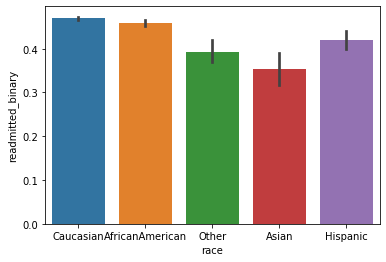

In [27]:
sns.barplot(x= 'race', y ='readmitted_binary', data = df_cat)

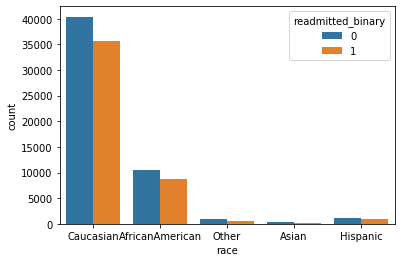

In [28]:
sns.countplot('race', hue = 'readmitted_binary', data = df_cat)

In [29]:
count_table = pd.crosstab(df_cat['readmitted_binary'], df_cat['race'])
count_table

race,AfricanAmerican,Asian,Caucasian,Hispanic,Other
readmitted_binary,,,,,
0,10421,415,40383,1183,915
1,8789,226,35716,854,591


In [30]:
stats.chisquare(count_table, axis = None)

Power_divergenceResult(statistic=211664.74165016637, pvalue=0.0)

In [31]:
type(count_table)

pandas.core.frame.DataFrame

**Conclusion:** Race has an impact on readmission rates

## Determine Relationship between Gender and Readmission

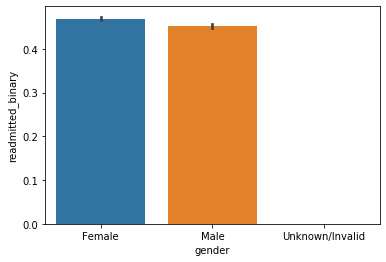

In [32]:
sns.barplot(x= 'gender', y ='readmitted_binary', data = df_cat)

In [33]:
count_table1 = pd.crosstab(df_cat['readmitted_binary'], df_cat['gender'])
count_table1

gender,Female,Male,Unknown/Invalid
readmitted_binary,,,
0,29038,25823,3
1,25670,21232,0


In [34]:
stats.chisquare(count_table1, axis = None)

Power_divergenceResult(statistic=52693.023996226635, pvalue=0.0)

**Conclusion:** Gender has an impact on readmission rates

## Determine Relationship between Insulin and Readmission

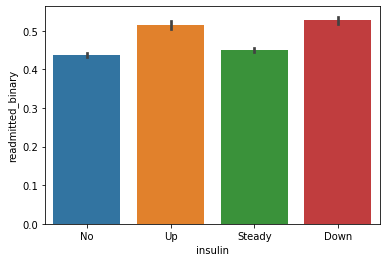

In [35]:
sns.barplot(x= 'insulin', y ='readmitted_binary', data = df_cat)

In [36]:
count_table2 = pd.crosstab(df_cat['readmitted_binary'], df_cat['insulin'])
count_table2

insulin,Down,No,Steady,Up
readmitted_binary,,,,
0,5768,26678,16934,5484
1,6450,20705,13915,5832


In [37]:
stats.chisquare(count_table2, axis = None)

Power_divergenceResult(statistic=36571.68402020321, pvalue=0.0)

## Adding Readmitted Binary into DF2

In [38]:
df2['readmitted_binary'] = df2['readmitted'].apply(lambda x: 0 if x=='NO' else 1)

## Determine Relationship between Time in Hospital and Readmission

(array([31399., 17736., 13911., 17496.,  5857.,  4388.,  5339.,  1851.,
         1447.,  2248.]),
 array([ 1. ,  2.3,  3.6,  4.9,  6.2,  7.5,  8.8, 10.1, 11.4, 12.7, 14. ]),
 <a list of 10 Patch objects>)

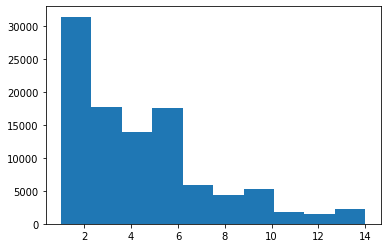

In [39]:
plt.hist(df2['time_in_hospital'])

In [40]:
admitted_time = df2.loc[df2['readmitted_binary']==0, 'time_in_hospital'] 
not_admitted_time = df2.loc[df2['readmitted_binary']==1, 'time_in_hospital']

In [41]:
age_list=df2['age'].unique()

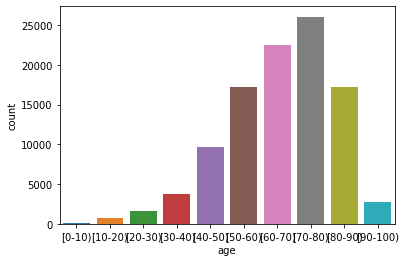

In [42]:
sns.countplot(df2['age'])

In [43]:
age_dic={}
for i in range(len(age_list)):
    age_dic[age_list[i]]=i


df2['age_rank'] = df['age'].map(age_dic)

In [44]:
df2.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,readmitted_binary,age_rank
0,Caucasian,Female,[0-10),6.0,25.0,1.0,1.0,41.0,0.0,1.0,...,No,No,No,No,No,No,No,NO,0,0
1,Caucasian,Female,[10-20),1.0,1.0,7.0,3.0,59.0,0.0,18.0,...,No,No,No,No,No,Ch,Yes,>30,1,1
2,AfricanAmerican,Female,[20-30),1.0,1.0,7.0,2.0,11.0,5.0,13.0,...,No,No,No,No,No,No,Yes,NO,0,2
3,Caucasian,Male,[30-40),1.0,1.0,7.0,2.0,44.0,1.0,16.0,...,No,No,No,No,No,Ch,Yes,NO,0,3
4,Caucasian,Male,[40-50),1.0,1.0,7.0,1.0,51.0,0.0,8.0,...,No,No,No,No,No,Ch,Yes,NO,0,4


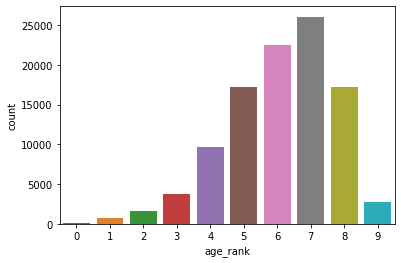

In [45]:
sns.countplot(df2['age_rank'])

In [46]:
df_num = df2.select_dtypes(include='number').copy()

In [47]:
df_num.head()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted_binary,age_rank
0,6.0,25.0,1.0,1.0,41.0,0.0,1.0,0.0,0.0,0.0,1,0,0
1,1.0,1.0,7.0,3.0,59.0,0.0,18.0,0.0,0.0,0.0,9,1,1
2,1.0,1.0,7.0,2.0,11.0,5.0,13.0,2.0,0.0,1.0,6,0,2
3,1.0,1.0,7.0,2.0,44.0,1.0,16.0,0.0,0.0,0.0,7,0,3
4,1.0,1.0,7.0,1.0,51.0,0.0,8.0,0.0,0.0,0.0,5,0,4


In [48]:
df_num.drop(['admission_type_id','discharge_disposition_id','admission_source_id','readmitted_binary','age_rank'], axis=1, inplace=True);

In [49]:
df_num.head()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
0,1.0,41.0,0.0,1.0,0.0,0.0,0.0,1
1,3.0,59.0,0.0,18.0,0.0,0.0,0.0,9
2,2.0,11.0,5.0,13.0,2.0,0.0,1.0,6
3,2.0,44.0,1.0,16.0,0.0,0.0,0.0,7
4,1.0,51.0,0.0,8.0,0.0,0.0,0.0,5


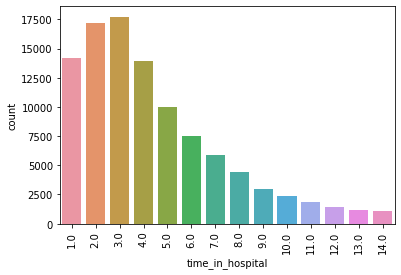

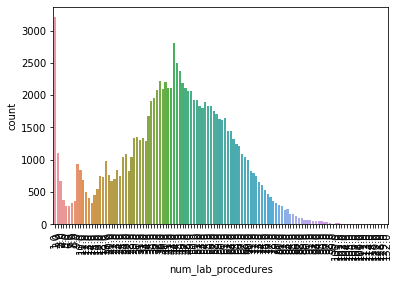

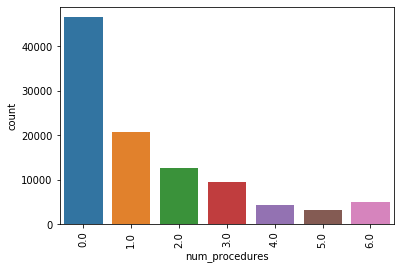

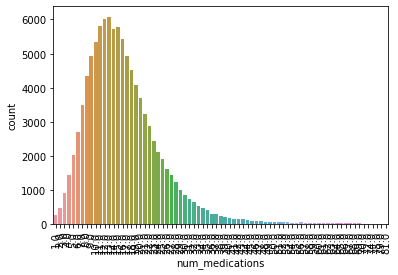

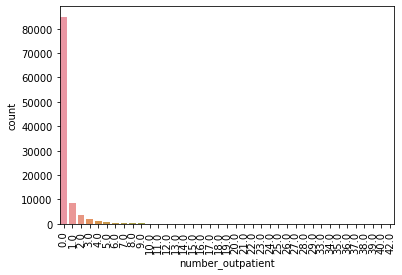

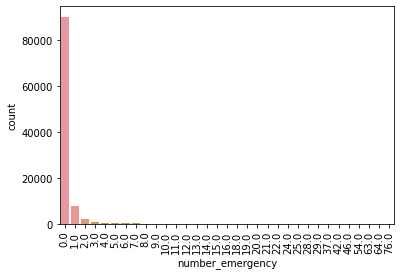

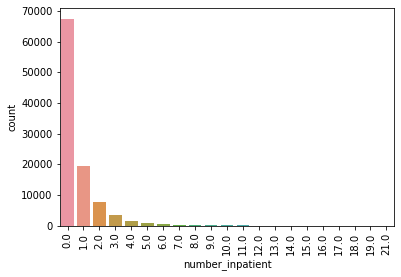

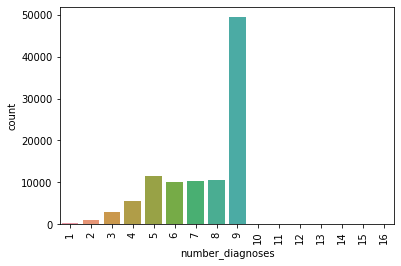

In [50]:
for name in df_num.columns:
    sns.countplot(df_num[name])
    plt.xticks(rotation=90)
    plt.show()
    

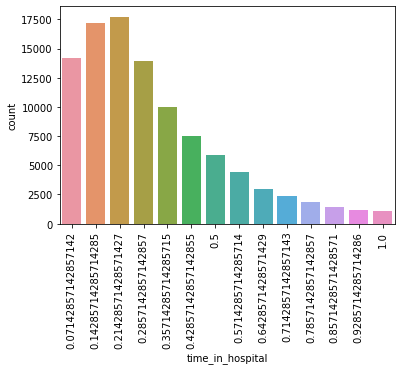

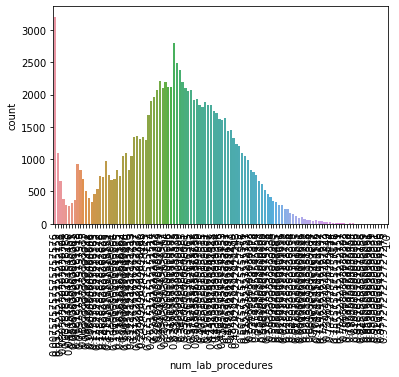

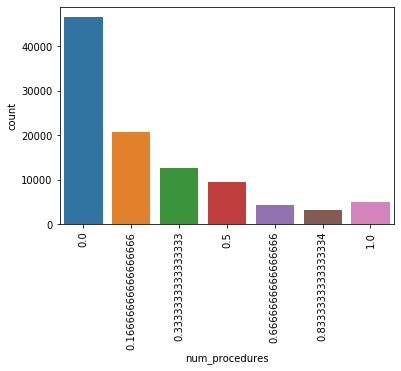

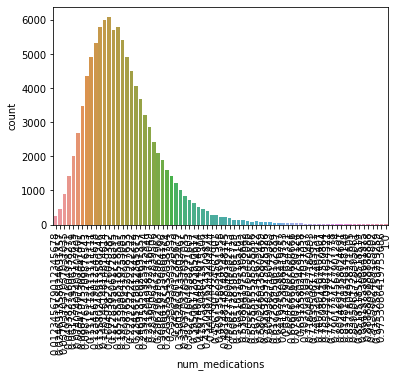

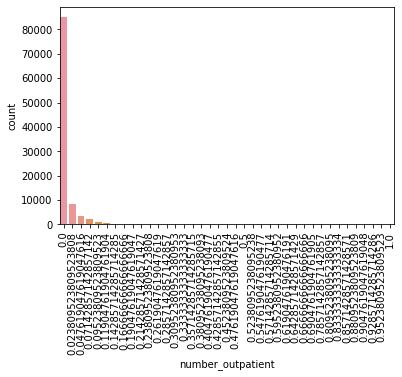

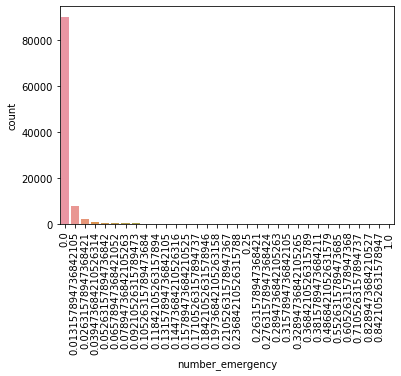

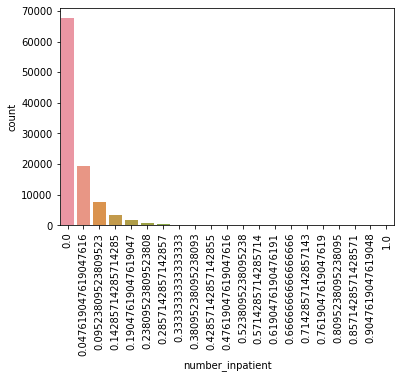

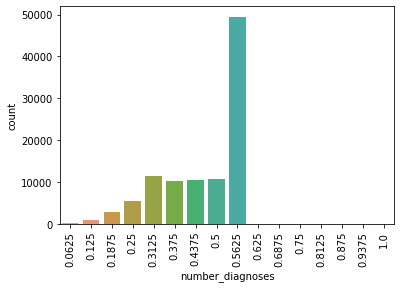

In [51]:
# scale to max
for name in df_num.columns:
    sns.countplot(df_num[name]/df_num[name].max()  )
    plt.xticks(rotation =90)
    plt.show()

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
scaler= StandardScaler()

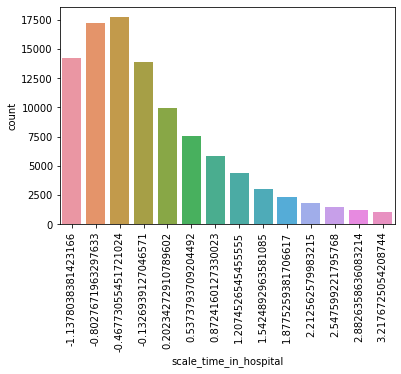

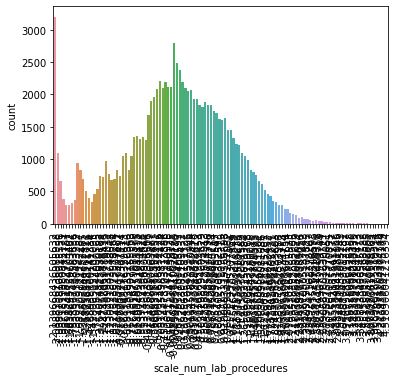

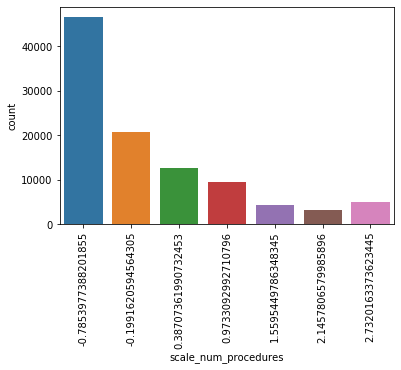

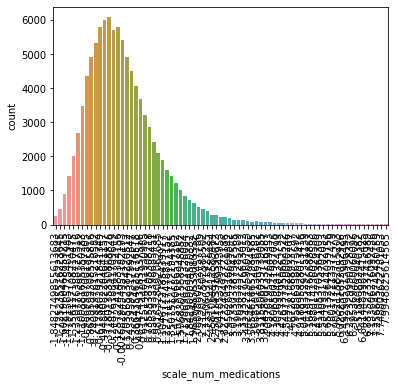

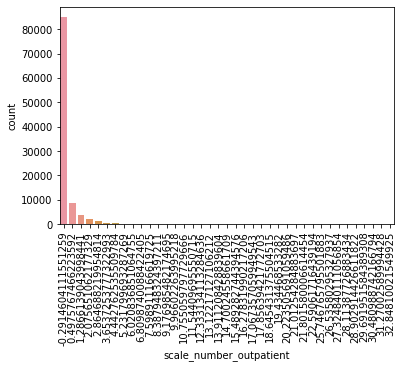

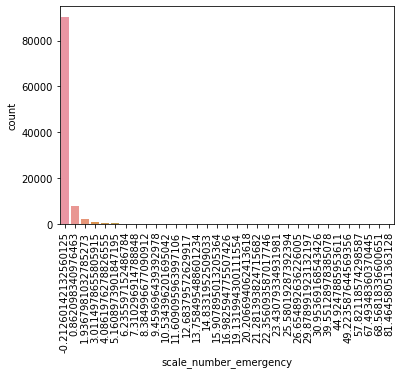

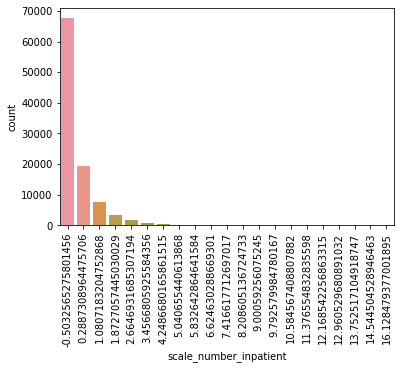

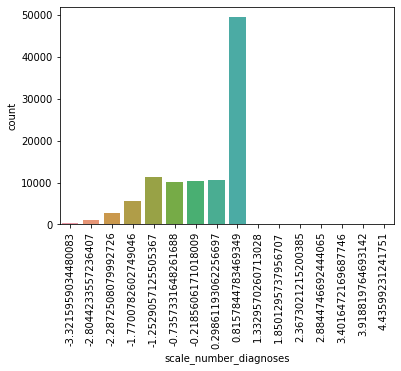

In [55]:
for name in df_num.columns:
    df_num['scale_'+name]=scaler.fit_transform(df_num[[name]])
    sns.countplot(df_num['scale_'+name])
    plt.xticks(rotation =90)
    plt.show()

## Combining two problematic features

Number of diagnoses and age group

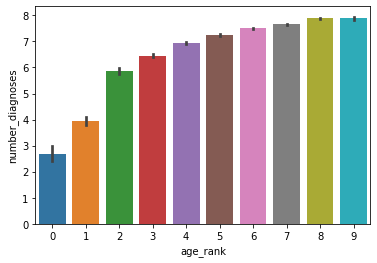

In [56]:
sns.barplot(data = df2, x= 'age_rank', y= 'number_diagnoses')

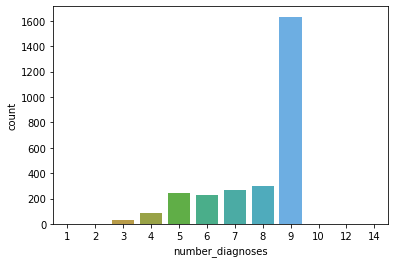

In [57]:
#Frequency of number of diagnoses for age group 9
sns.countplot(df2.loc[df2['age_rank']==9, 'number_diagnoses'])

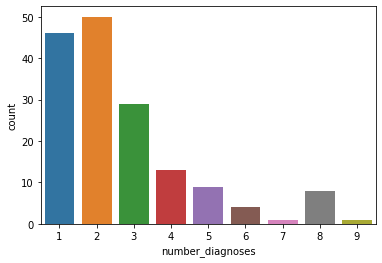

In [59]:
#Frequency of number of diagnoses for age group 0
sns.countplot(df2.loc[df2['age_rank']==0, 'number_diagnoses'])

In [60]:
df2.corr()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted_binary,age_rank
admission_type_id,1.000000,0.083496,0.106208,-0.012205,-0.143522,0.130035,0.079733,0.026494,-0.019156,-0.038198,-0.117026,-0.004929,-0.007185
discharge_disposition_id,0.083496,1.000000,0.018034,0.162741,0.023480,0.015954,0.108771,-0.009139,-0.024472,0.020681,0.046930,-0.014752,0.114317
admission_source_id,0.106208,0.018034,1.000000,-0.006845,0.049023,-0.135420,-0.054513,0.027100,0.059858,0.036396,0.072119,0.039926,0.044740
time_in_hospital,-0.012205,0.162741,-0.006845,1.000000,0.318660,0.191566,0.466301,-0.008804,-0.009627,0.073672,0.220308,0.051445,0.107443
num_lab_procedures,-0.143522,0.023480,0.049023,0.318660,1.000000,0.058060,0.268134,-0.007619,-0.002262,0.039249,0.152797,0.039209,0.020799
num_procedures,0.130035,0.015954,-0.135420,0.191566,0.058060,1.000000,0.385777,-0.024812,-0.038188,-0.066260,0.073734,-0.044748,-0.030104
num_medications,0.079733,0.108771,-0.054513,0.466301,0.268134,0.385777,1.000000,0.045250,0.013197,0.064063,0.261546,0.046778,0.041861
number_outpatient,0.026494,-0.009139,0.027100,-0.008804,-0.007619,-0.024812,0.045250,1.000000,0.091437,0.107144,0.094132,0.082178,0.023738
number_emergency,-0.019156,-0.024472,0.059858,-0.009627,-0.002262,-0.038188,0.013197,0.091437,1.000000,0.266336,0.055531,0.103022,-0.087218
number_inpatient,-0.038198,0.020681,0.036396,0.073672,0.039249,-0.066260,0.064063,0.107144,0.266336,1.000000,0.104589,0.217079,-0.042815


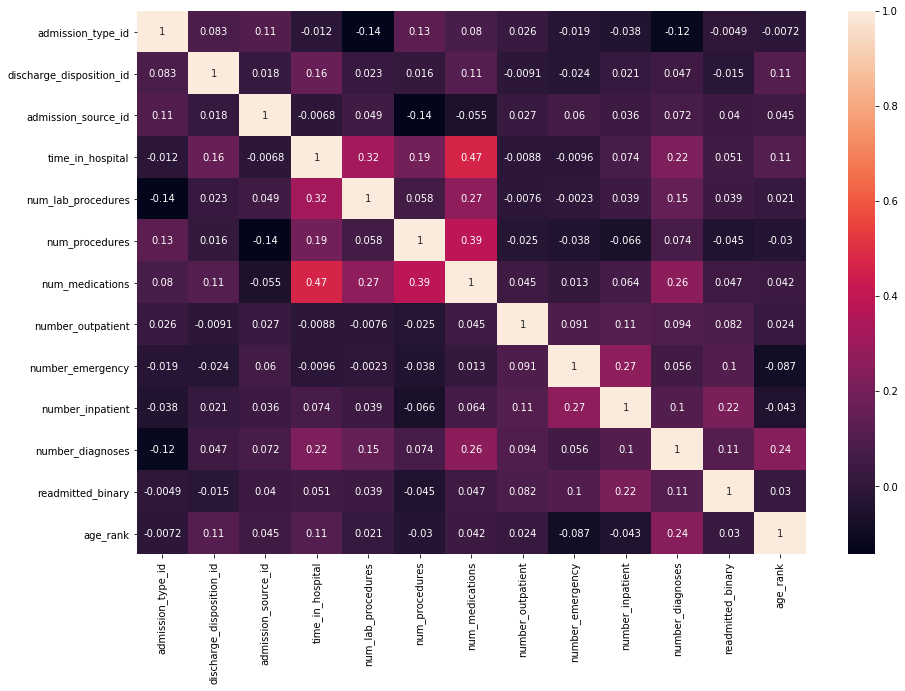

In [65]:
plt.figure(figsize=(15,10))
sns.heatmap(df2.corr(),annot=True)

In [67]:
from sklearn.feature_selection import SelectKBest, f_classif

In [72]:
df2.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'readmitted_binary', 'age_rank'],
      dtype='object')

In [104]:
df2 = df2.fillna(0)
Y=df2['readmitted_binary']
X=df2.drop(columns=['race', 'gender', 'age','diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted','readmitted_binary'], axis=1)

In [113]:
k  = 5
kbest = SelectKBest(k=k, score_func= f_classif)
X_best_feature = kbest.fit_transform(X,Y)


In [114]:
X_best_feature = pd.DataFrame(X_best_feature, columns = X.columns[kbest.get_support()])

In [115]:
X_best_feature.columns

Index(['time_in_hospital', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient'],
      dtype='object')

In [116]:
X_best_feature.head()

,time_in_hospital,num_medications,number_outpatient,number_emergency,number_inpatient
0,1.0,1.0,0.0,0.0,0.0
1,3.0,18.0,0.0,0.0,0.0
2,2.0,13.0,2.0,0.0,1.0
3,2.0,16.0,0.0,0.0,0.0
4,1.0,8.0,0.0,0.0,0.0


In [117]:
kbest.scores_

array([2.45905707e+00, 2.21187835e+01, 1.63863158e+02, 2.68736638e+02,
       1.57151728e+02, 2.04177799e+02, 2.23650329e+02, 6.92067166e+02,
       1.09169390e+03, 5.03038911e+03, 9.41519557e+01])

In [119]:
pd.Series(kbest.scores_, index=X.columns)

admission_type_id              2.459057
discharge_disposition_id      22.118784
admission_source_id          163.863158
time_in_hospital             268.736638
num_lab_procedures           157.151728
num_procedures               204.177799
num_medications              223.650329
number_outpatient            692.067166
number_emergency            1091.693904
number_inpatient            5030.389108
age_rank                      94.151956
dtype: float64

In [120]:
from sklearn.decomposition import PCA

In [124]:
pca = PCA(n_components =11)
X_pca =pca.fit_transform(X)
cov = np.cov(X_pca.T)

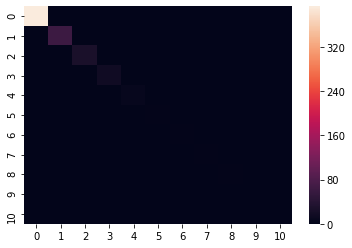

In [126]:
sns.heatmap(cov)

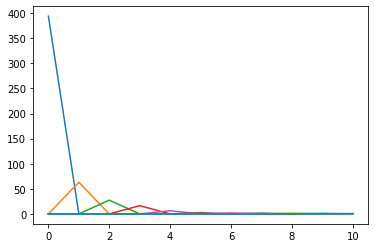

In [129]:
plt.plot(cov);

In [2]:
pre_split_df = pd.read_csv(
    'https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/diabetic-data-cleaning.zip', 
    usecols=['readmitted',
        'time_in_hospital', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient'
    ],
    compression='zip'
)

In [3]:
pre_split_df['readmitted'].value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

In [7]:
pre_split_df['readmitted_binary'] = pre_split_df['readmitted'].apply(lambda x: 0 if x=='NO' else 1)

In [8]:
pre_split_df['readmitted_binary'].value_counts()

0    54864
1    46902
Name: readmitted_binary, dtype: int64

In [16]:
y = pre_split_df['readmitted_binary']
x = pre_split_df.drop(["readmitted_binary", "readmitted"], axis=1)

In [17]:
y.value_counts()

0    54864
1    46902
Name: readmitted_binary, dtype: int64

In [18]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 5 columns):
time_in_hospital     101766 non-null int64
num_medications      101766 non-null int64
number_outpatient    101766 non-null int64
number_emergency     101766 non-null int64
number_inpatient     101766 non-null int64
dtypes: int64(5)
memory usage: 3.9 MB


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, 
                                                    stratify=y, random_state=42)

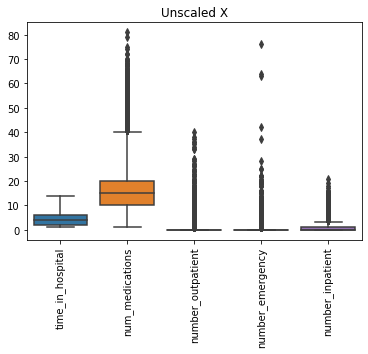

In [20]:
ax = sns.boxplot(data=X_train, whis=2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Unscaled X')
plt.show()

In [21]:
from sklearn.preprocessing import QuantileTransformer

scale = QuantileTransformer(output_distribution='normal')

X_train_scale = scale.fit_transform(X_train)
X_train_scale = pd.DataFrame(X_train_scale, columns=X_train.columns)

X_test_scale = scale.transform(X_test)
X_test_scale = pd.DataFrame(X_test_scale, columns=X_test.columns)

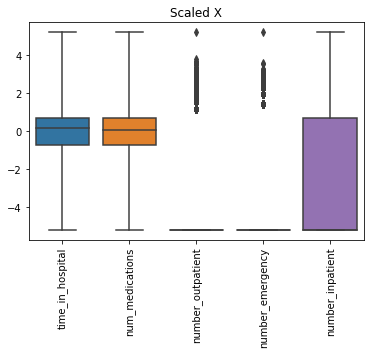

In [22]:
ax = sns.boxplot(data=X_train_scale, whis=5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Scaled X')
plt.show()

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

c_values = []
train_scores=[]
test_scores=[]
train_loss = []
test_loss = []

c_low = -7
c_high = 1

for c in np.logspace(c_low, c_high, num=c_high-c_low+1):
    c_values.append(c)
    
    logit = LogisticRegression(C=c, penalty='l2', solver='liblinear')

    logit.fit(X_train_scale, Y_train)
    train_probs = logit.predict_proba(X_train_scale)
    test_probs = logit.predict_proba(X_test_scale)
    
    train_scores.append(logit.score(X_train_scale, Y_train))
    test_scores.append(logit.score(X_test_scale, Y_test))
    train_loss.append(log_loss(Y_train, train_probs))
    test_loss.append(log_loss(Y_test, test_probs))
score_list = list(zip(train_scores, test_scores, train_loss, test_loss))

In [24]:
score_data = pd.DataFrame(score_list, index=c_values, 
                          columns=['Train Score', 'Test Score', 'Train Log Loss', 'Test Log Loss'])
score_data

,Train Score,Test Score,Train Log Loss,Test Log Loss
1.000000e-07,0.557134,0.555290,0.690665,0.690638
1.000000e-06,0.564504,0.562037,0.681292,0.681084
1.000000e-05,0.610085,0.613167,0.671531,0.670526
1.000000e-04,0.612920,0.617917,0.665705,0.663890
1.000000e-03,0.614689,0.619227,0.659357,0.657619
1.000000e-02,0.615826,0.619555,0.658309,0.656714
1.000000e-01,0.616191,0.619456,0.658287,0.656714
1.000000e+00,0.616388,0.619358,0.658286,0.656717
1.000000e+01,0.616402,0.619358,0.658286,0.656717


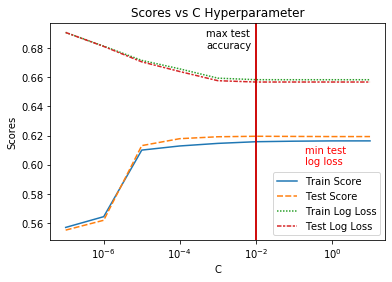

In [25]:
ax = sns.lineplot(data=score_data)
ax.set(xscale='log')
plt.axvline(score_data['Test Score'].idxmax(), color='k')
plt.axvline(score_data['Test Log Loss'].idxmin(), color='r')
plt.xlabel('C')
plt.ylabel('Scores')
plt.text(0.0005, 0.68, 'max test\naccuracy')
plt.text(0.2, 0.6, 'min test\nlog loss', color='r')
plt.title('Scores vs C Hyperparameter')
plt.show()